# 라이브러리 Import 

## 기본 라이브러리

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Scipy

In [34]:
from scipy.stats import f_oneway
from scipy.stats import spearmanr

# 데이터 로드

## train data

In [2]:
train_df = pd.read_csv('./data/train.csv',encoding='utf-8-sig')
train_df

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,1347,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,1348,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,1349,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


## test data

In [3]:
test_df = pd.read_csv('./data/test.csv',encoding='utf-8-sig')
test_df

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1346,1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1347,1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920
1348,1349,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004


## 변수명 한글화

In [4]:
train_orgin_col = list(train_df.columns)
train_orgin_col

['id',
 'Overall Qual',
 'Gr Liv Area',
 'Exter Qual',
 'Garage Cars',
 'Garage Area',
 'Kitchen Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Bsmt Qual',
 'Full Bath',
 'Year Built',
 'Year Remod/Add',
 'Garage Yr Blt',
 'target']

In [5]:
test_orgin_col = list(test_df.columns)
test_orgin_col

['id',
 'Overall Qual',
 'Gr Liv Area',
 'Exter Qual',
 'Garage Cars',
 'Garage Area',
 'Kitchen Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Bsmt Qual',
 'Full Bath',
 'Year Built',
 'Year Remod/Add',
 'Garage Yr Blt']

In [6]:
train_kor_col = ['고유ID','전반적품질','지상층면적','외관재료품질','차고케파','차고면적','부엌품질','지하실면적','1층면적','지하실높이'
                 ,'지상층화장실개수','완공연도','리모델링연도','차고완공연도','target']

In [7]:
test_kor_col = ['고유ID','전반적품질','지상층면적','외관재료품질','차고케파','차고면적','부엌품질','지하실면적','1층면적','지하실높이'
                 ,'지상층화장실개수','완공연도','리모델링연도','차고완공연도']

In [8]:
train_col_dict = {}
for k,v in zip(train_orgin_col,train_kor_col):
    train_col_dict[k] = v
    
train_df = train_df.rename(columns=train_col_dict)
train_df.head()

,고유ID,전반적품질,지상층면적,외관재료품질,차고케파,차고면적,부엌품질,지하실면적,1층면적,지하실높이,지상층화장실개수,완공연도,리모델링연도,차고완공연도,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [10]:
train_df['외관재료품질'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [9]:
test_col_dict = {}
for k,v in zip(test_orgin_col,test_kor_col):
    test_col_dict[k] = v
    
test_df = test_df.rename(columns=test_col_dict)
test_df.head()

,고유ID,전반적품질,지상층면적,외관재료품질,차고케파,차고면적,부엌품질,지하실면적,1층면적,지하실높이,지상층화장실개수,완공연도,리모델링연도,차고완공연도
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


# 개별 피쳐 EDA

## Ex,TA,Gd,Fa 데이터

In [58]:
def rating_data_LE(x):
    
    if x == 'Ex':
        return 3
    elif x == 'Gd':
        return 2
    elif x == 'TA':
        return 1
    elif x == 'Fa':
        return 0


def rating_data_EDA(column_name):
    
    EX = train_df[train_df[column_name]=='Ex']['target']
    Gd = train_df[train_df[column_name]=='Gd']['target']
    TA = train_df[train_df[column_name]=='TA']['target']
    Fa = train_df[train_df[column_name]=='Fa']['target']

    F_statistic, pVal = f_oneway(EX, Gd, TA, Fa)
    
    train_df[f'{column_name}_LE'] = train_df[column_name].map(rating_data_LE)
    
    corr_data = spearmanr(train_df[f'{column_name}_LE'],train_df['target'])
    
    plt.boxplot([EX, Gd, TA, Fa],labels=['Ex','Gd','TA','Fa'])
    plt.show()
    return pd.DataFrame.from_dict({'F통계량':F_statistic,'Anova_p_val':pVal,'corr':np.round(corr_data[0],5)},orient='index').T

## 외관재료 품질

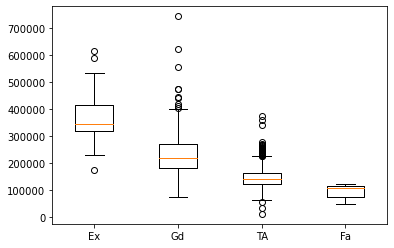

,F통계량,Anova_p_val,corr
0,425.332589,2.620766e-194,0.68702


In [52]:
rating_data_EDA('외관재료품질')

# 통계적으로 유의한 차이가 있음

## 부엌품질

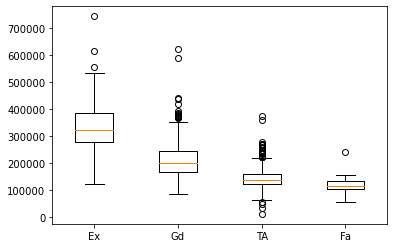

,F통계량,Anova_p_val,corr
0,387.87523,1.624351e-181,0.65799


In [53]:
rating_data_EDA('부엌품질')

# 통계적으로 유의한 차이가 있음

## 지하실 높이

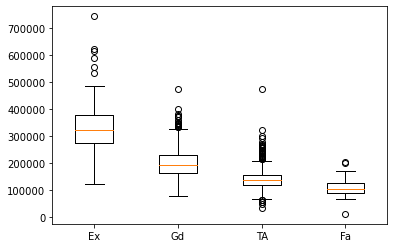

,F통계량,Anova_p_val,corr
0,462.428391,0.0,"[nan, nan]"


In [59]:
rating_data_EDA('지하실높이')

# 통계적으로 유의한 차이가 있음